In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [82]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [83]:
data = pd.read_csv("src/data.csv", sep=",")

In [84]:
for i in range(len(data)):
    data.loc[i, "Previous qualification (grade)"] = data.loc[i, "Previous qualification (grade)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Curricular units 1st sem (grade)"] = str(data.loc[i, "Curricular units 1st sem (grade)"]).replace("٫", ".")
    data.loc[i, "Curricular units 2nd sem (grade)"] = data.loc[i, "Curricular units 2nd sem (grade)"].replace("٫", ".")
    # data.loc[i, "Curricular units 2nd sem (credited)"] = data.loc[i, "Curricular units 2nd sem (credited)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Unemployment rate"] = data.loc[i, "Unemployment rate"].replace("٫", ".")
    data.loc[i, "Inflation rate"] = data.loc[i, "Inflation rate"].replace("٫", ".")
    data.loc[i, "GDP"] = data.loc[i, "GDP"].replace("٫", ".")
    

In [85]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14,0,0,6,6,6,13.6666666666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0,0,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.4285714285714,0,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.3333333333333,0,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.6,0,0,6,8,5,12.6666666666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120,105,1,1,9,9,119,1,0,1,0,0,0,18,1,0,6,6,6,12,0,0,6,6,2,11,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.8,0,0,5,6,5,12,0,9.4,-0.8,-3.12,Graduate


In [86]:
data["Target"] = data["Target"].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

<Axes: >

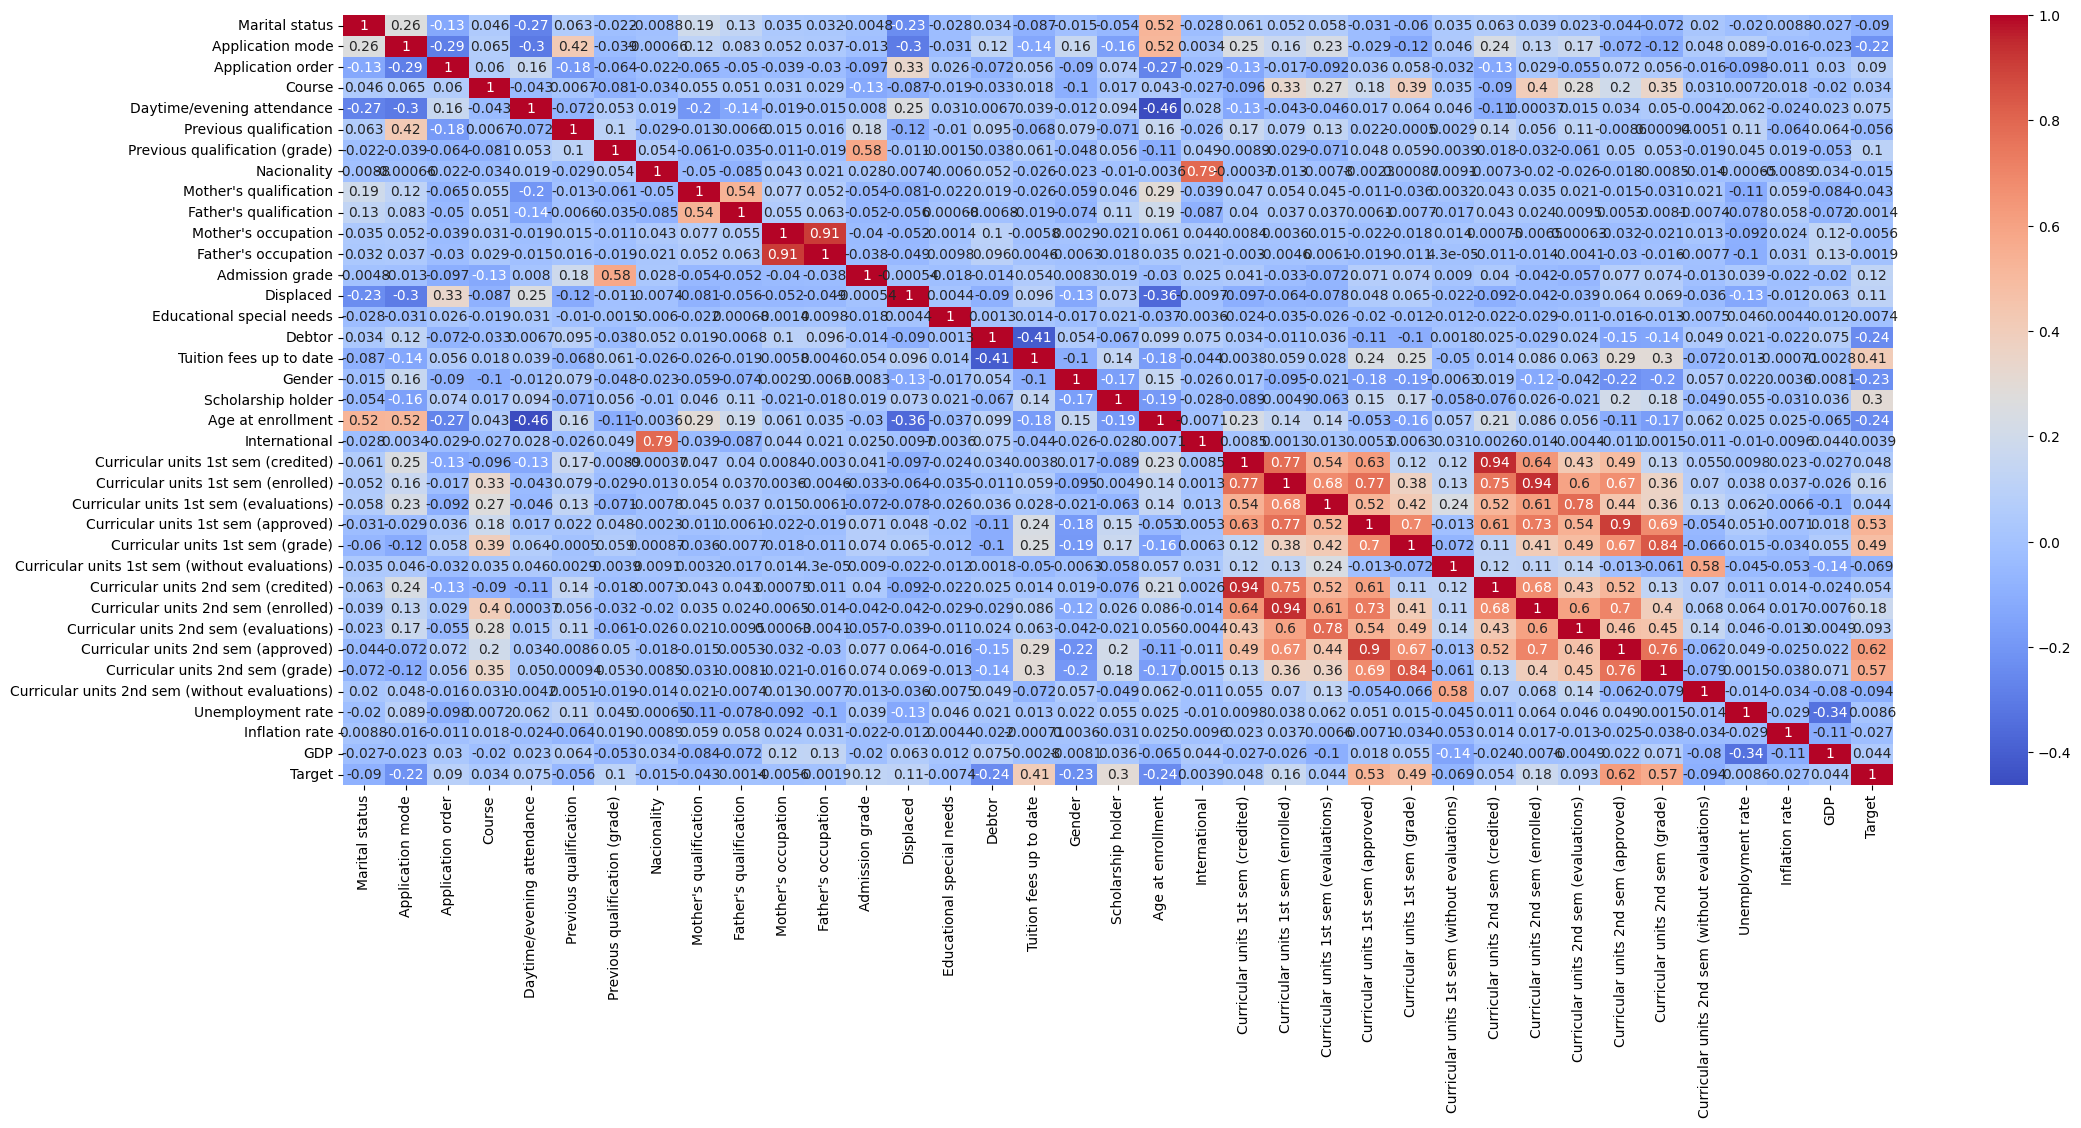

In [87]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [88]:
data.corr()["Target"].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Curricular units 1st sem (credited)               0.0481

In [89]:
data.corr(method="spearman")["Target"].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.654049
Curricular units 1st sem (approved)               0.594194
Curricular units 2nd sem (grade)                  0.559823
Curricular units 1st sem (grade)                  0.497344
Tuition fees up to date                           0.400283
Scholarship holder                                0.301103
Curricular units 2nd sem (enrolled)               0.241456
Curricular units 1st sem (enrolled)               0.230576
Admission grade                                   0.125791
Displaced                                         0.113241
Previous qualification (grade)                    0.112414
Application order                                 0.102185
Daytime/evening attendance                        0.073066
GDP                                               0.053497
Curricular units 2nd sem (credited)               0.035004
Mother's occupation                               0.0327

In [90]:
df = data
df = df.drop(columns=['Nacionality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

In [91]:
df["Interaction_CU_1st_2nd_Approved"] = df['Curricular units 1st sem (approved)'] * data['Curricular units 2nd sem (approved)']

In [92]:
for i in range(len(df)):
    df.loc[i, 'Interaction_CU_1st_2nd_Grade'] =  float(df.loc[i, 'Curricular units 1st sem (grade)']) * float(df.loc[i, 'Curricular units 2nd sem (grade)'])

In [93]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Interaction_CU_1st_2nd_Approved,Interaction_CU_1st_2nd_Grade
0,1,17,5,1,1,122,127.3,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,1,15,1,1,1,160,142.5,1,0,0,1,0,19,6,6,14,0,0,6,6,6,13.6666666666667,0,2,36,191.333333
2,1,1,5,1,1,122,124.8,1,0,0,1,0,19,6,0,0,0,0,6,0,0,0,0,0,0,0.000000
3,1,17,2,1,1,122,119.6,1,0,1,0,0,20,6,6,13.4285714285714,0,0,6,10,5,12.4,0,2,30,166.514286
4,2,39,1,0,1,100,141.5,0,0,1,0,0,45,6,5,12.3333333333333,0,0,6,6,6,13,0,2,30,160.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125,122.2,0,0,1,1,0,19,6,5,13.6,0,0,6,8,5,12.6666666666667,0,2,25,172.266667
4420,1,1,2,1,1,120,119,1,1,0,0,0,18,6,6,12,0,0,6,6,2,11,0,0,12,132.000000
4421,1,1,1,1,1,154,149.5,1,0,1,0,1,30,7,7,14.9125,0,0,8,9,1,13.5,0,0,7,201.318750
4422,1,1,1,1,1,180,153.8,1,0,1,0,1,20,5,5,13.8,0,0,5,6,5,12,0,2,25,165.600000


In [94]:
df['Total_CU_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']

In [95]:
for i in range(len(df)):
    df.loc[i, 'Total_CU_Grade'] = (float(df.loc[i, 'Curricular units 1st sem (grade)']) + float(df.loc[i, 'Curricular units 2nd sem (grade)'])) / 2

In [96]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Interaction_CU_1st_2nd_Approved,Interaction_CU_1st_2nd_Grade,Total_CU_Approved,Total_CU_Grade
0,1,17,5,1,1,122,127.3,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000
1,1,15,1,1,1,160,142.5,1,0,0,1,0,19,6,6,14,0,0,6,6,6,13.6666666666667,0,2,36,191.333333,12,13.833333
2,1,1,5,1,1,122,124.8,1,0,0,1,0,19,6,0,0,0,0,6,0,0,0,0,0,0,0.000000,0,0.000000
3,1,17,2,1,1,122,119.6,1,0,1,0,0,20,6,6,13.4285714285714,0,0,6,10,5,12.4,0,2,30,166.514286,11,12.914286
4,2,39,1,0,1,100,141.5,0,0,1,0,0,45,6,5,12.3333333333333,0,0,6,6,6,13,0,2,30,160.333333,11,12.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125,122.2,0,0,1,1,0,19,6,5,13.6,0,0,6,8,5,12.6666666666667,0,2,25,172.266667,10,13.133333
4420,1,1,2,1,1,120,119,1,1,0,0,0,18,6,6,12,0,0,6,6,2,11,0,0,12,132.000000,8,11.500000
4421,1,1,1,1,1,154,149.5,1,0,1,0,1,30,7,7,14.9125,0,0,8,9,1,13.5,0,0,7,201.318750,8,14.206250
4422,1,1,1,1,1,180,153.8,1,0,1,0,1,20,5,5,13.8,0,0,5,6,5,12,0,2,25,165.600000,10,12.900000


In [97]:
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)

In [98]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (without evaluations),Target,Interaction_CU_1st_2nd_Approved,Interaction_CU_1st_2nd_Grade,Total_CU_Approved,Total_CU_Grade
0,1,17,5,1,1,122,127.3,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0.000000,0,0.000000
1,1,15,1,1,1,160,142.5,1,0,0,1,0,19,6,0,0,6,6,0,2,36,191.333333,12,13.833333
2,1,1,5,1,1,122,124.8,1,0,0,1,0,19,6,0,0,6,0,0,0,0,0.000000,0,0.000000
3,1,17,2,1,1,122,119.6,1,0,1,0,0,20,6,0,0,6,10,0,2,30,166.514286,11,12.914286
4,2,39,1,0,1,100,141.5,0,0,1,0,0,45,6,0,0,6,6,0,2,30,160.333333,11,12.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125,122.2,0,0,1,1,0,19,6,0,0,6,8,0,2,25,172.266667,10,13.133333
4420,1,1,2,1,1,120,119,1,1,0,0,0,18,6,0,0,6,6,0,0,12,132.000000,8,11.500000
4421,1,1,1,1,1,154,149.5,1,0,1,0,1,30,7,0,0,8,9,0,0,7,201.318750,8,14.206250
4422,1,1,1,1,1,180,153.8,1,0,1,0,1,20,5,0,0,5,6,0,2,25,165.600000,10,12.900000


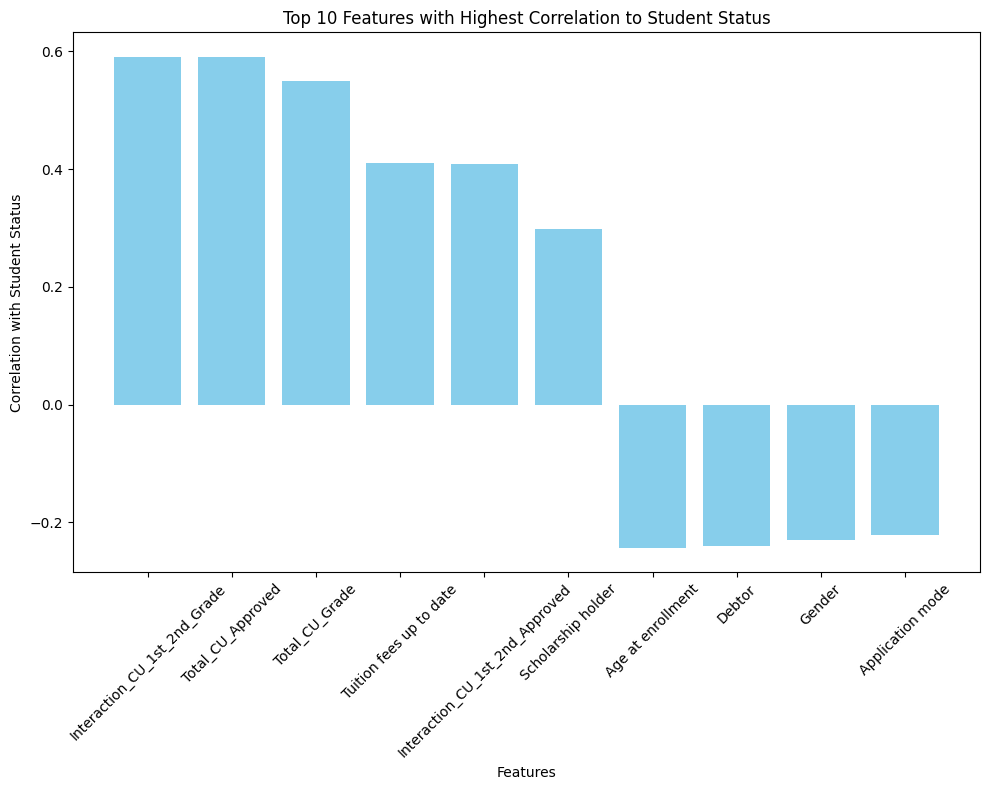

In [99]:
correlations = df.corr()['Target'].drop('Target')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
top_10_features

Index(['Interaction_CU_1st_2nd_Grade', 'Total_CU_Approved', 'Total_CU_Grade',
       'Tuition fees up to date', 'Interaction_CU_1st_2nd_Approved',
       'Scholarship holder', 'Age at enrollment', 'Debtor', 'Gender',
       'Application mode'],
      dtype='object')

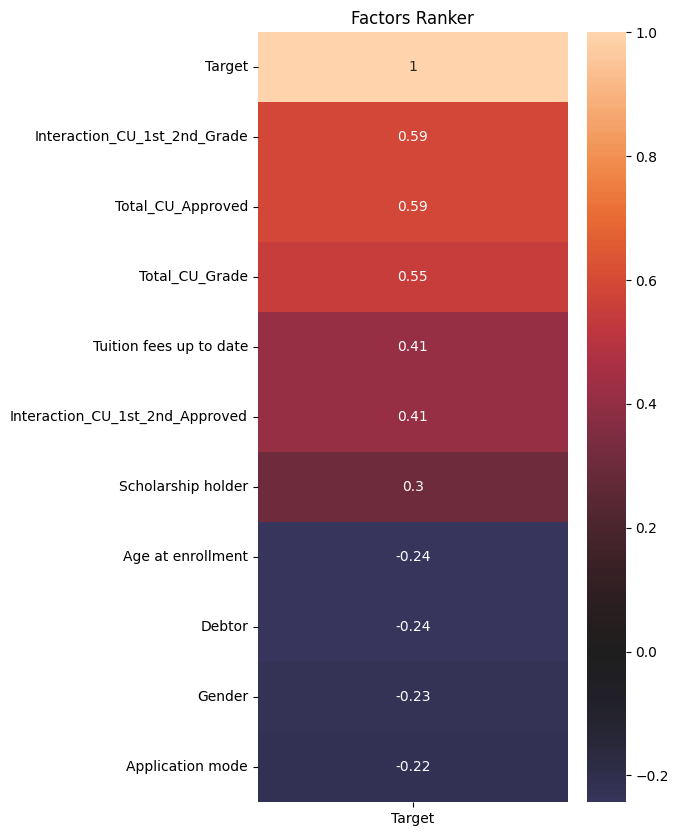

In [101]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = df[top_10_features.to_list() + ['Target']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Target']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Target', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

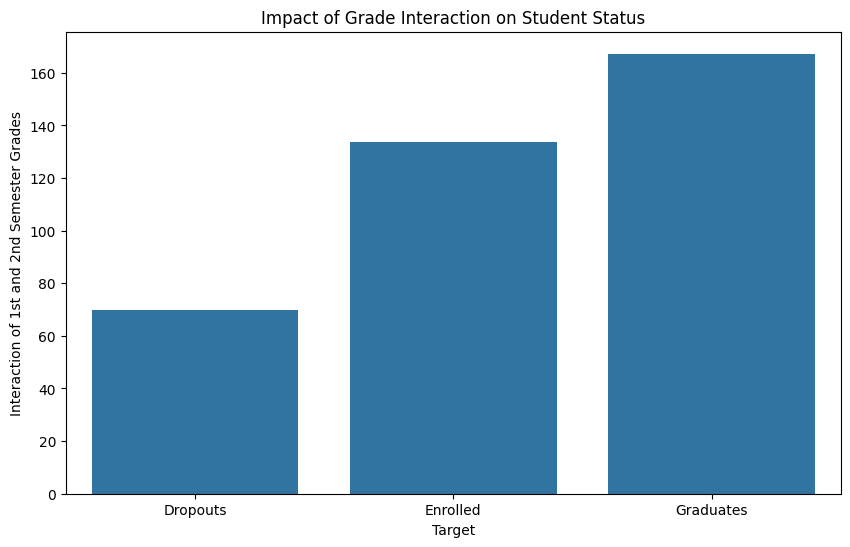

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Target')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

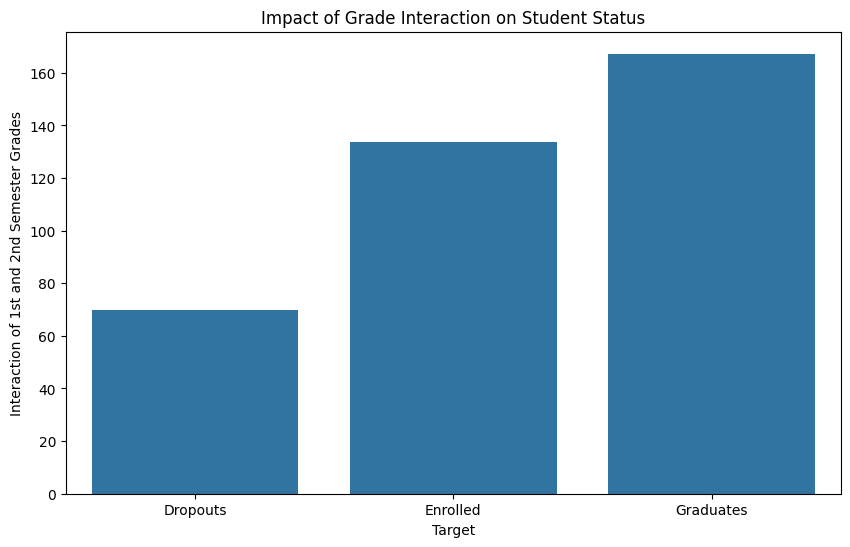

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Target')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

In [104]:
from sklearn.manifold import TSNE

In [105]:
for i in range(len(df)):
    if df.loc[i, "Target"] == 2:
        df.loc[i, "Target"] = 1

In [106]:
X = df.drop('Target', axis=1)
y = df['Target']

In [107]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [108]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(scaled_data)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,-76.477692,12.022917,0.0
1,1.014407,-18.076010,1.0
2,-51.250538,7.201196,0.0
3,48.906471,7.359283,1.0
4,-17.134872,42.139732,1.0


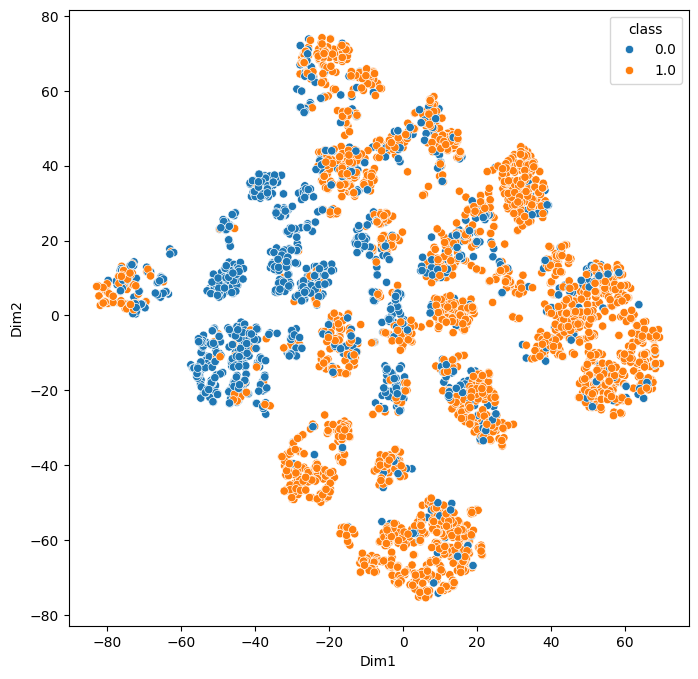

In [109]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

In [110]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
graidient_boosting = GradientBoostingClassifier(learning_rate=0.047454011884736254, max_depth=2, n_estimators=114)
graidient_boosting.fit(x_train, y_train)
print(graidient_boosting.score(x_train, y_train))
print(graidient_boosting.score(x_test, y_test))

0.8790618818875389
0.8463276836158192


In [115]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=199)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train))
print(forest.score(x_test, y_test))

0.8801921446736366
0.8497175141242937


## 0.8790618818875389
## 0.8463276836158192

In [117]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.5311516421999636
0.5013018449462026
